# Lesson 11 - Logistic Regression

### The following topics are discussed in this notebook:
* Logistic regression background
* Performing logistic regression using scikit-learn.

### Additional Resources
* [Hands-On Machine Learning, Ch 4](https://github.com/ageron/handson-ml/blob/master/04_training_linear_models.ipynb)
* [Introduction to Statistical Learning, Section 4.3](http://www-bcf.usc.edu/~gareth/ISL/ISLR%20Seventh%20Printing.pdf)


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Prelimary: The Sigmoid Function

The **sigmoid** or **logit** function is given by the following formula:

$\Large \sigma(x) = \frac{e^x}{1+e^x} = \frac{1}{1 + e^{-x}}$

A plot of the sigmoid function is shown below.

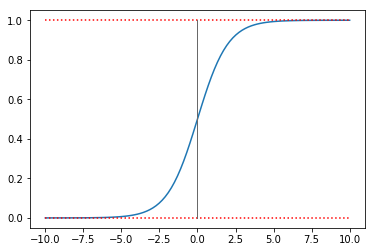

In [2]:
x = np.linspace(-10,10,100)
y = 1 / (1 + np.exp(-x))

plt.close()
plt.rcParams["figure.figsize"] = [6,4]
plt.plot(x,y)
plt.plot([-10,10],[1,1], linestyle=':', c="r")
plt.plot([-10,10],[0,0], linestyle=':', c="r")
plt.plot([0,0],[0,1], linewidth=1, c="dimgray")
plt.show()

We can adjust the position and shape of the sigmoid function by swapping `x` out of a linear function of `x`. 

$\LARGE \sigma(x) = \frac{e^{b_0 + b_1 x}}{1+e^{b_0 + b_1 x}} = \frac{1}{1 + e^{-({b_0 + b_1 x})}}$


In [2]:
%run -i examples/example08.py

A Jupyter Widget

## Logistic Regresion

Logistic regression is a probabilistic linear classification method that can be used to estimate the probability that an observation belongs to a particular class based on the feature values. Logistic regression can be adapted for use in multi-class classification problems, but we will begin by discussing the standard version of the algorithm, which is a binary classifier. 

### Form of the Logistic Regression Model 

* Assume we have several features, $X = [x^{(1)}, x^{(2)}, ..., x^{(k)}]$.


* We wish to predict the value of a categorical label $y$. Assume the classes of $y$ are coded as 0 and 1. 


* Let $ p \approx P \left[ y = 1 ~|~ X = x \right]$. 


* That is, $ p$ is an estimate of the probability that an observation belongs to class 1, given some specific set of feature values, $X = x$.


* We will assume that $ p$ follows a model of the form: $\enspace \LARGE p = \frac {1} {
1 + e^{-\left[b_0 + b_1 x^{(1)} + b_2 x^{(2)} ... + b_k x^{(k)}\right]}
}$

### Training the Model using Log Likelihood

* Let $b_0, b_1, ..., b_p$ be a set (not necessarily optimal) parameter values used to define a model $\enspace\large p = \frac {1} {1 + \exp\left[-\left({b}_0 + {b}_1 x^{(1)} + {b}_2 x^{(2)} ... + {b}_p x^{(p)}\right)\right]}$.


* For each training observation, calculate $\enspace\large p_i = \frac {1} {1 + \exp\left[-\left({b}_0 + {b}_1 x_i^{(1)} + {b}_2 x_i^{(2)} ... + {b}_p x_i^{(p)}\right)\right]}$.


* For each $i$, define $\pi_i$ as follows: $
\quad\pi_i = \left\{
        \begin{array}{ll}
            p_i & \text{if  } y_i = 1 \\
            1 - p_i & \text{if  } ~y_i = 0
        \end{array}
    \right.$
    
    
* Then $\pi_i$ is the estimate our current model provides for the probability that observation $i$ falls into its actual observed class. 


* We want to choose a model that maximizes the probability of getting the set of labels we have observed. In otherwise, we want to maximize the likelihood score, $L = \pi_1 \cdot \pi_2 \cdot ... \cdot \pi_n$.


* From a computational standpoint, it is generally easy to maximize log-likelihood: $\ln L = \ln(\pi_1) + \ln(\pi_2) + ... + \ln(\pi_n)$


* We will use the **`minimize()`** function from `scipy` to minimize $-\ln L$, which is equivalent to maximizing $\ln L$.


* As with linear regression, we will denote the optimal parameter values as $\hat\beta_0, \hat\beta_1, \hat\beta_2, ..., \hat\beta_k$. 


* We will use $\hat p$ to denote predicted probabilities calculated using the optimal model.


### Using a Logistic Regression Model to Make Predictions

* Define a threshold value $t$. In general, we will use $t = 0.5$.

* Given a set of observed features, $X$, we first calculate $\hat p$ using our optimal model. We then classify the observation as follows: $
\quad\hat y = \left\{
        \begin{array}{ll}
            0 & \text{if  } \hat p < t \\
            1 & \text{if  } \hat p \geq t
        \end{array}
    \right.$



In [3]:
%run -i examples/example09.py

A Jupyter Widget

A Jupyter Widget

## Calculating Log Likelihood for a Proposed Model

In [4]:
x1 = np.array([3, 6, 4, 7, 2]).reshape(5,1)
x2 = np.array([5, 3, 6, 1, 8]).reshape(5,1)
X = np.concatenate([x1, x2], axis = 1)
y = np.array(['A', 'A', 'B', 'A', 'B'])

print(X)
print(y)

[[3 5]
 [6 3]
 [4 6]
 [7 1]
 [2 8]]
['A' 'A' 'B' 'A' 'B']


In [5]:
beta = np.array([-7, 0.6, 0.8])
z = beta[0] + np.sum(beta[1:] * X, axis=1)
p = 1 / (1 + np.exp(-z)) #gives the probability that each observation lands in class 1
print(p)
pi = np.where(y == 'B', p, 1 - p) 
pi = np.where(pi == 0, 1e-100, pi) #used to make sure there are no zeros in the array
loglik = np.sum(np.log(pi))
print(loglik)

[ 0.23147522  0.26894142  0.549834    0.11920292  0.64565631]
-1.73909898577


In [6]:
df = pd.DataFrame(np.concatenate([p.reshape(1,5),pi.reshape(1,5)], axis=0))
df.columns = y
df.index = ['p','pi']
print(df)

           A         A         B         A         B
p   0.231475  0.268941  0.549834  0.119203  0.645656
pi  0.768525  0.731059  0.549834  0.880797  0.645656


## Using Scikit-Learn to Perform Logistic Regression


In [7]:
%run -i examples/example09.py

A Jupyter Widget

A Jupyter Widget

In [8]:
from sklearn.linear_model import LogisticRegression

In [9]:
X = np.array([2, 5, 6, 7, 8, 10]).reshape(6,1)
y = np.array([0, 0, 1, 0, 1, 1])

In [10]:
model = LogisticRegression(C=1e100)#have to set c to a large value(will be discussed why later in semester)
model.fit(X,y)

print(model.intercept_)
print(model.coef_)

[-6.86654229]
[[ 1.05945133]]


### Making Predictions

In [11]:
X_new = np.array([4, 6, 6.5, 7]).reshape(4,1)
print(model.predict(X_new))

[0 0 1 1]


In [12]:
print(model.predict_proba(X_new))

[[ 0.9326883   0.0673117 ]
 [ 0.62476763  0.37523237]
 [ 0.49502732  0.50497268]
 [ 0.36595326  0.63404674]]


### Model Accuracy

In [13]:
print('Accuracy:', model.score(X,y))

Accuracy: 0.666666666667


## Logistic Regression with Multiple Features

In [14]:
import MLUtilities as mlu
import sklearn.datasets as skds

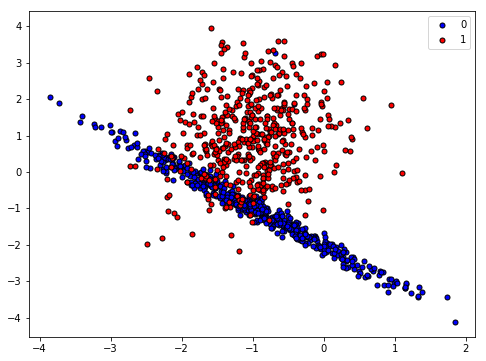

In [15]:
np.random.seed(45)
X, y = skds.make_classification(n_samples = 1000, n_classes = 2, n_features=2, 
                                n_redundant=0, n_informative=2, n_clusters_per_class=1,) 

plt.close()
plt.figure(figsize=(8, 6))
plt.scatter(X[y==0, 0], X[y==0, 1], marker='o', c='b', s=25, edgecolor='k', label=0)
plt.scatter(X[y==1, 0], X[y==1, 1], marker='o', c='r', s=25, edgecolor='k', label=1)
plt.legend()
plt.show()

In [16]:
lr_model = LogisticRegression(C=1e10)
lr_model.fit(X,y)

print('Intercept:', lr_model.intercept_)
print('Coefficients:', lr_model.coef_)
print('Accuracy:', lr_model.score(X,y))

Intercept: [ 3.85635985]
Coefficients: [[ 2.59652573  3.16599814]]
Accuracy: 0.925


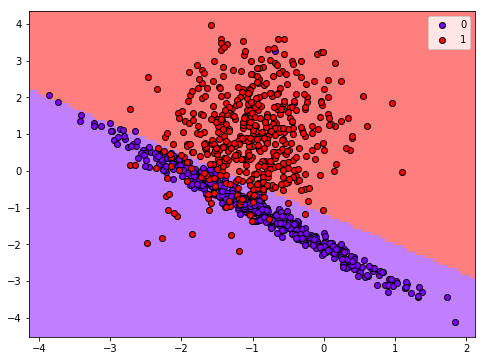

In [17]:
mlu.plot_regions(lr_model, X, y)

In [18]:
sc_model = mlu.SplitClassifier(X,y)
sc_model.summary()

+----------------------------+
|  Split Classifier Summary  |
+----------------------------+
Number of training observations: 1000
Axis/Feature split: 1
Threshold value: 0.155990163811
Predicted class below threshold: 0
Predicted class above threshold: 1
Training accuracy: 0.82 



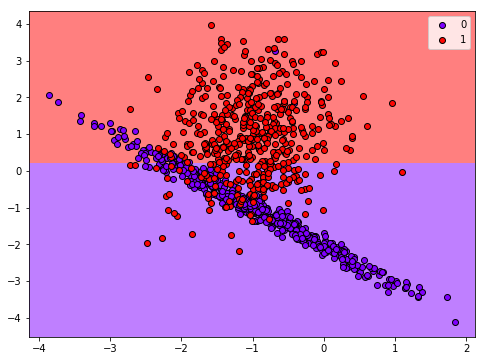

In [19]:
mlu.plot_regions(sc_model, X, y)

## Logistic Regression in Higher Dimensions

In [20]:
df = pd.read_table("Datasets/3drings.txt", sep='\t')
print(df.head())

         x1        x2         x3  y
0 -0.903059 -0.091599  12.994658  0
1  0.232524 -0.004573  12.022049  1
2  0.215563 -0.223809  12.258246  1
3 -0.318782 -0.051883  12.620665  1
4  0.776826 -0.609386  11.832560  0


In [21]:
import seaborn as sns

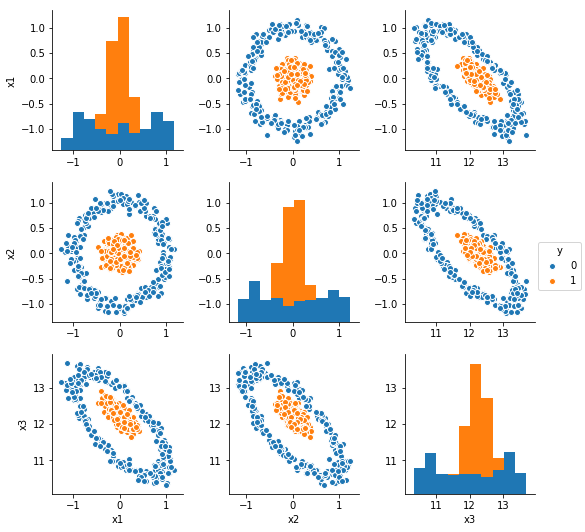

In [22]:
plt.close()
g = sns.pairplot(data=df, hue='y', vars=['x1','x2','x3'])
plt.show()

In [23]:
X = df.iloc[:,:3]#features dataframe
y = df.iloc[:,3]#labels dataframe

In [24]:
sc_rings = mlu.SplitClassifier(X,y)
sc_rings.summary()

+----------------------------+
|  Split Classifier Summary  |
+----------------------------+
Number of training observations: 500
Axis/Feature split: 2
Threshold value: 11.848697005
Predicted class below threshold: 0
Predicted class above threshold: 1
Training accuracy: 0.718 



In [25]:
lr_rings = LogisticRegression(C=1e10)
lr_rings.fit(X,y)

print('Intercept:', lr_rings.intercept_)
print('Coefficients:', lr_rings.coef_)
print('Accuracy:', lr_rings.score(X,y))

Intercept: [-1001.87079653]
Coefficients: [[ 82.44922976  82.523557    82.62846848]]
Accuracy: 1.0


In [26]:
from mpl_toolkits.mplot3d import Axes3D

<IPython.core.display.Javascript object>


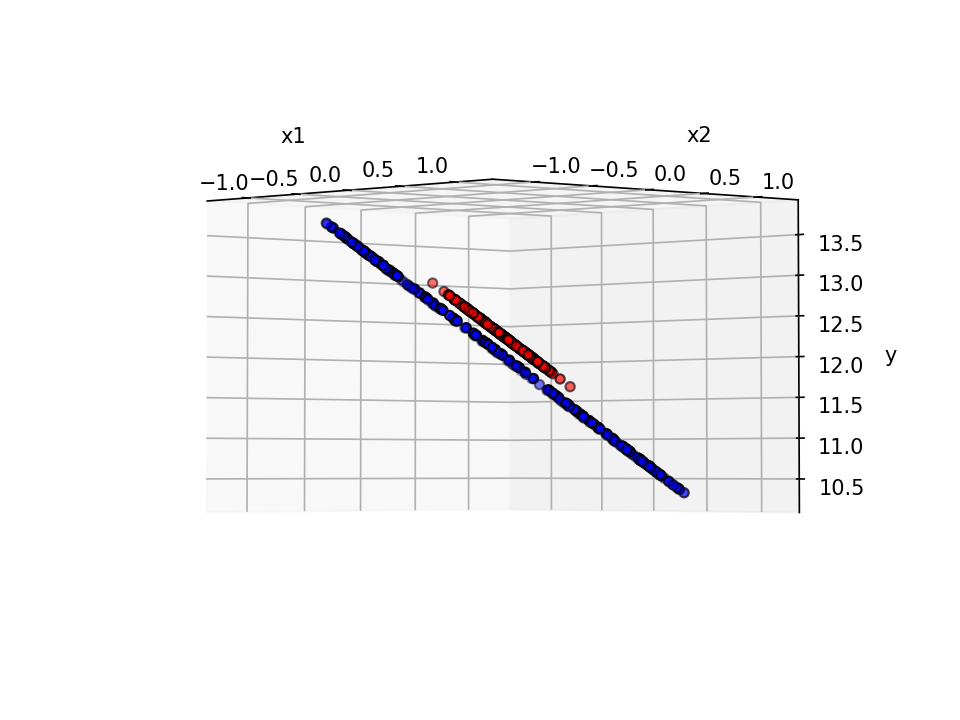

In [27]:
%matplotlib notebook
plt.close()
fig = plt.figure()
ax = fig.gca(projection='3d')

ax.scatter(X.loc[y==0,'x1'], X.loc[y==0,'x2'], X.loc[y==0,'x3'], s=20, marker = 'o', c='b', edgecolor='k', label=0)
ax.scatter(X.loc[y==1,'x1'], X.loc[y==1,'x2'], X.loc[y==1,'x3'], s=20, marker = 'o', c='r', edgecolor='k', label=1)

ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('y')
plt.show()